In [1]:
import os
import pandas as pd 
import numpy as np
import statsmodels.api as sm

In [2]:
# 현재경로 확인
os.getcwd()

'C:\\Users\\pc\\Desktop\\python\\머신러닝 A to Z\\Part 05~11) Machine Learning\\06. 회귀분석\\실습코드'

In [3]:
# 데이터 불러오기
boston = pd.read_csv("C:/Users/pc/Desktop/python/머신러닝 A to Z/Part 05~11) Machine Learning/06. 회귀분석/Data/part2_data/Boston_house.csv")
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [4]:
boston_data = boston.drop(['Target'],axis=1)
# boston_data

In [6]:
'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

'\n타겟 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율'

# crim, rm, lstat을 통한 다중 선형 회귀분석

In [4]:
x_data=boston[['CRIM','RM','LSTAT']] ##변수 여러개
target = boston[['Target']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [5]:
x_data1 = sm.add_constant(x_data, has_constant='add')


In [6]:
multi_model = sm.OLS(target,x_data1)
fitted_multi_model=multi_model.fit()

In [7]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          1.01e-112
Time:                        23:24:28   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# crim, rm, lstat, b, tax, age, zn, nox, indus 변수를 통한 다중선형회귀분석

In [20]:
## boston data에서 원하는 변수만 뽑아오기
x_data2 = boston[['CRIM','RM','LSTAT','B','TAX','AGE','ZN','NOX','INDUS']]
x_data2

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
0,0.00632,6.575,4.98,396.90,296,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222,54.2,0.0,0.458,2.18
...,...,...,...,...,...,...,...,...,...
501,0.06263,6.593,9.67,391.99,273,69.1,0.0,0.573,11.93
502,0.04527,6.120,9.08,396.90,273,76.7,0.0,0.573,11.93
503,0.06076,6.976,5.64,396.90,273,91.0,0.0,0.573,11.93
504,0.10959,6.794,6.48,393.45,273,89.3,0.0,0.573,11.93


In [9]:
# 상수항추가
x_data2_ = sm.add_constant(x_data2,has_constant = 'add')

In [21]:
# 회귀모델 적합
multi_model2 = sm.OLS(target,x_data2_)
fitted_multi_model2 = multi_model2.fit()

In [22]:
# 결과 출력
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          5.76e-111
Time:                        23:31:03   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
RM             5.0922      0.458     11.109      0.000       4.192       5.993
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
B              0.0090      0.003      2.952      0.003       0.003       0.015
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# 세변수만 추가한 모델의 회귀 계수
fitted_multi_model.params

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

In [24]:
# full모델의 회귀계수
fitted_multi_model2.params

const   -7.108827
CRIM    -0.045293
RM       5.092238
LSTAT   -0.565133
B        0.008974
TAX     -0.006025
AGE      0.023619
ZN       0.029377
NOX      3.483832
INDUS    0.029270
dtype: float64

**변수의 수가 다른데 비슷한 성능을 가졌으므로 더 적은 변수의 모델이 성능이 좋다고 할 수 있다.**

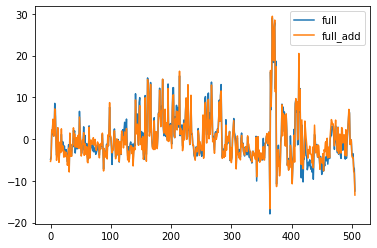

In [25]:
# base모델과 full모델의 잔차비교 
import matplotlib.pyplot as plt
fitted_multi_model.resid.plot(label="full")
fitted_multi_model2.resid.plot(label="full_add")
plt.legend()

# 상관계수/산점도를 통해 다중공선성 확인

- 다중 공산성이란 x변수들 끼리 선형관계가 있는 것이어서 예측력을 저하시키고 계수의 오류를 불러일으킴
- 다중 공산성이 심해지면 beta를 구하는 식인 x transpose의 역행렬을 구할 수 없기 때문에 베타계수를 구할 수 없다.

In [27]:
# 상관행렬
x_data2.corr()

,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
CRIM,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
RM,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
LSTAT,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
B,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
TAX,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
AGE,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
ZN,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
NOX,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
INDUS,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


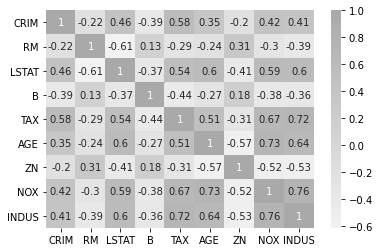

In [28]:
## 상관행렬 시각화 해서 보기 
import seaborn as sns;
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(x_data2.corr(), annot=True, cmap=cmap)
plt.show()

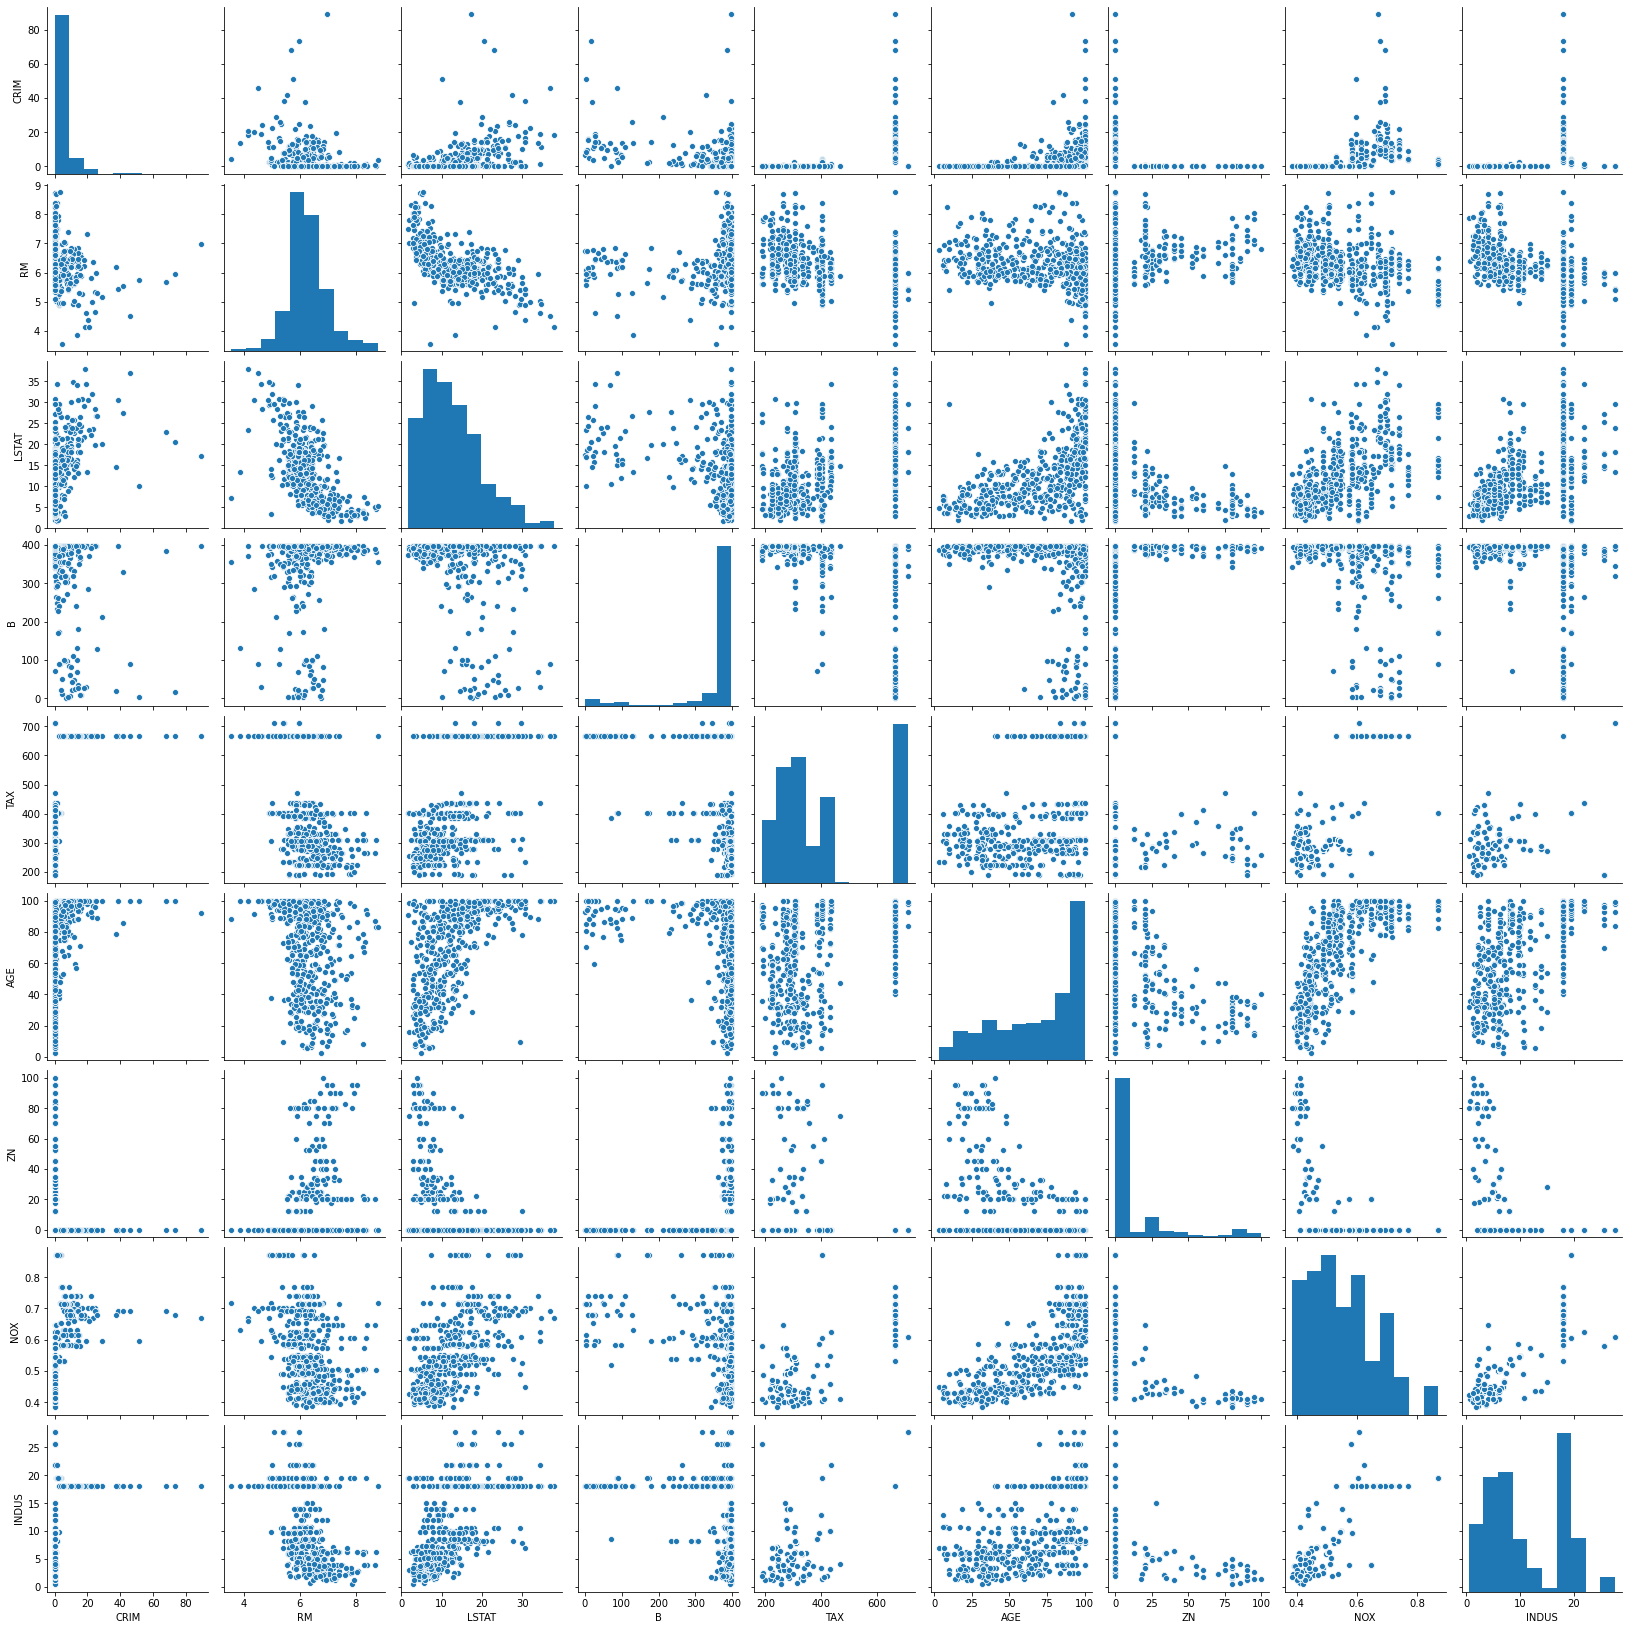

In [29]:
## 변수별 산점도 시각화
sns.pairplot(x_data2)
plt.show()

**선헝의 관계가 있으면 다중 공선성을 의심해야 한다.**

# VIF를 통한 다중공선성 확인 

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x_data2.values, i) for i in range(x_data2.shape[1])] #각각의 칼럼에 대하여 VIF factor를 돌린다.
vif["features"] = x_data2.columns
##vif
vif

,VIF Factor,features
0,1.917332,CRIM
1,46.535369,RM
2,8.844137,LSTAT
3,16.856737,B
4,19.923044,TAX
5,18.457503,AGE
6,2.086502,ZN
7,72.439753,NOX
8,12.642137,INDUS


**vif가 의미하는 바는 그 변수를 y로 두고 나머지 변수를 회귀를 돌렸을 때 남지 변수들로 그 변수를 얼만큼 설명할 수 있는지(나머지 변수들로 설명할 수 있는 변동의 비율)**

In [40]:
## nox 변수 제거후(X_data3) VIF 확인 

vif = pd.DataFrame()
x_data3= x_data2.drop('NOX',axis=1)
vif["VIF Factor"] = [variance_inflation_factor(
    x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

,VIF Factor,features
0,1.916648,CRIM
1,30.806301,RM
2,8.171214,LSTAT
3,16.735751,B
4,18.727105,TAX
5,16.339792,AGE
6,2.074500,ZN
7,11.217461,INDUS


In [42]:
## RM 변수 제거후(x_data4) VIF 확인 

vif = pd.DataFrame()
x_data4= x_data3.drop('RM',axis=1)
vif["VIF Factor"] = [variance_inflation_factor(
    x_data4.values, i) for i in range(x_data4.shape[1])]
vif["features"] = x_data4.columns
vif

,VIF Factor,features
0,1.907517,CRIM
1,7.933529,LSTAT
2,7.442569,B
3,16.233237,TAX
4,13.765377,AGE
5,1.820070,ZN
6,11.116823,INDUS


In [43]:
# nox 변수 제거한 데이터(x_data3) 상수항 추가 후 회귀 모델 적합

x_data3_ = sm.add_constant(x_data3,has_constant = "add")
model_vif = sm.OLS(target,x_data3_)
fitted_model_vif = model_vif.fit()

x_data4_ = sm.add_constant(x_data4,has_constant = "add")
model_vif2 = sm.OLS(target,x_data4_)
fitted_model_vif2 = model_vif2.fit()

# nox, rm 변수 제거한 데이터(x_data4) 상수항 추가 후 회귀 모델 적합


In [44]:
## 회귀모델 결과 비교 
fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.6
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          7.62e-112
Time:                        23:59:24   Log-Likelihood:                -1566.0
No. Observations:                 506   AIC:                             3150.
Df Residuals:                     497   BIC:                             3188.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9162      3.596     -1.645      0.101     -12.981       1.149
CRIM          -0.0451      0.036     -1.264      0.207      -0.115       0.025
RM             5.1027      0.458     11.138      0.000       4.203       6.003
LSTAT         -0.5628      0.057     -9.825      0.000      -0.675      -0.450
B              0.0087      0.003      2.880      0.004       0.003       0.015
TAX           -0.0056      0.002     -2.344      0.019      -0.010      -0.001
AGE            0.0287      0.013      2.179      0.030       0.003       0.055
ZN             0.0284      0.013      2.130      0.034       0.002       0.055
INDUS          0.0486      0.062      0.789      0.431      -0.072       0.170
==============================================================================
Omnibus:                      193.530   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.773
Skew:                           1.677   Prob(JB):                    5.98e-184
Kurtosis:                       8.364   Cond. No.                     8.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
fitted_model_vif2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     97.20
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           5.53e-89
Time:                        23:59:39   Log-Likelihood:                -1622.3
No. Observations:                 506   AIC:                             3261.
Df Residuals:                     498   BIC:                             3294.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6634      1.844     16.087      0.000      26.041      33.286
CRIM          -0.0329      0.040     -0.825      0.410      -0.111       0.045
LSTAT         -0.9256      0.053    -17.589      0.000      -1.029      -0.822
B              0.0046      0.003      1.384      0.167      -0.002       0.011
TAX           -0.0048      0.003     -1.814      0.070      -0.010       0.000
AGE            0.0703      0.014      4.993      0.000       0.043       0.098
ZN             0.0513      0.015      3.490      0.001       0.022       0.080
INDUS         -0.0357      0.068     -0.523      0.601      -0.170       0.098
==============================================================================
Omnibus:                      138.742   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.077
Skew:                           1.427   Prob(JB):                     2.32e-69
Kurtosis:                       5.617   Cond. No.                     3.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- vif테스트를 거쳐 rm변수를 제거했더니 r2이 크게 낮아짐 그렇다는 말은 제거하면 안됐다는 말임
- AIC도 낮을수록 좋은데 RM을 포함한 모델이 AIC도 더 낮음

# 학습 / 검증데이터 분할

In [52]:
from sklearn.model_selection import train_test_split
X = x_data2_
y = target
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state = 1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(354, 10) (152, 10) (354, 1) (152, 1)


- train데이터는 354개 test데이터는 152개가 나옴

In [49]:
train_x.head()

,const,CRIM,RM,LSTAT,B,TAX,AGE,ZN,NOX,INDUS
13,1.0,0.62976,5.949,8.26,396.90,307,61.8,0.0,0.538,8.14
61,1.0,0.17171,5.966,14.44,378.08,284,93.4,25.0,0.453,5.13
377,1.0,9.82349,6.794,21.24,396.90,666,98.8,0.0,0.671,18.10
39,1.0,0.02763,6.595,4.32,395.63,252,21.8,75.0,0.428,2.95
365,1.0,4.55587,3.561,7.12,354.70,666,87.9,0.0,0.718,18.10


**상수항이 추가되어있는 모습**

**train과 test데이터를 나눌때 비율은 보통 7:3, 8:2**

In [59]:
# train_x에 상수항 추가후 회귀모델 적합
train_x
fit_1 = sm.OLS(train_y,train_x)
fit_1 = fit_1.fit()


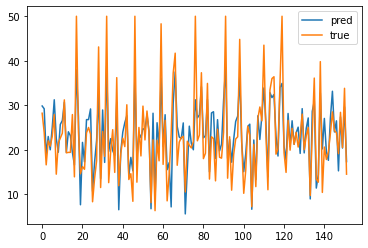

In [70]:
## 검증데이터 에대한 예측값과 true값 비교 
plt.plot(np.array(fit_1.predict(test_x)),label="pred")
plt.plot(np.array(test_y['Target']),label="true")
plt.legend()
plt.show()

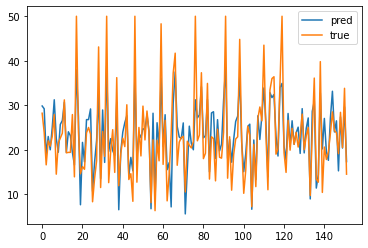

In [71]:
plt.plot(np.array(fit_1.predict(test_x)),label="pred")
plt.plot(np.array(test_y),label="true")
plt.legend()
plt.show()

**얼추 잘 따라가는 걸 확인할 수 있다**

In [53]:
## x_data3와 x_data4 학습 검증데이터 분할
X = x_data3_
y = target
train_x2, test_x2, train_y2, test_y2 = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state = 1)
print(train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape)

(354, 9) (152, 9) (354, 1) (152, 1)


In [54]:
X = x_data4_
y = target
train_x3, test_x3, train_y3, test_y3 = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state = 1)
print(train_x3.shape, test_x3.shape, train_y3.shape, test_y3.shape)

(354, 8) (152, 8) (354, 1) (152, 1)


In [55]:
test_y.head()

,Target
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8


In [56]:
test_y2.head()

,Target
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8


**데이터의 인덱스가 동일하게 분할됨**

In [61]:
# x_data3/x_data4 회귀 모델 적합(fit2,fit3)
fit_2 = sm.OLS(train_y2,train_x2)
fit_2 = fit_2.fit()
fit_3 = sm.OLS(train_y3,train_x3)
fit_3 = fit_3.fit()

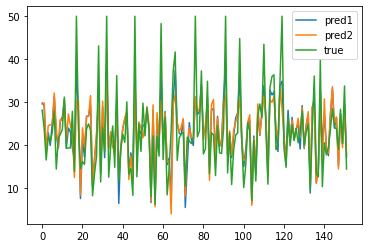

In [67]:
## true값과 예측값 비교  ---> 예측값을 검증할 때는 검증데이터인 test를 사용한다.
plt.plot(np.array(fit_2.predict(test_x2)),label="pred1")
plt.plot(np.array(fit_3.predict(test_x3)),label="pred2")
plt.plot(np.array(test_y2),label="true")
plt.legend()
plt.show()

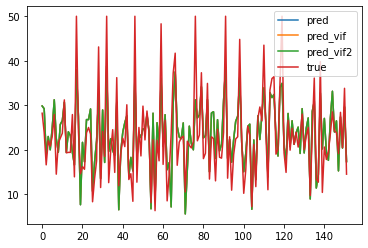

In [63]:
## full모델 추가해서 비교 
plt.plot(np.array(fit_1.predict(test_x)),label="pred")
plt.plot(np.array(fit_2.predict(test_x2)),label="pred_vif")
plt.plot(np.array(fit_2.predict(test_x2)),label="pred_vif2")
plt.plot(np.array(test_y2),label="true")
plt.legend()
plt.show()

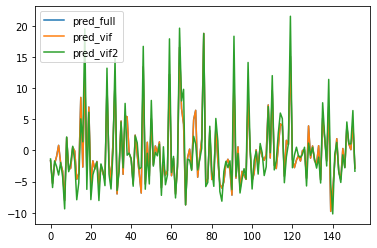

In [64]:
plt.plot(np.array(test_y2['Target']-fit_1.predict(test_x)),label="pred_full")
plt.plot(np.array(test_y2['Target']-fit_2.predict(test_x2)),label="pred_vif")
plt.plot(np.array(test_y2['Target']-fit_3.predict(test_x3)),label="pred_vif2")
plt.legend()
plt.show()

- 여기는 실제값과 예측 값의 차이이므로 잔차이다.

# MSE를 통한 검증데이터에 대한 성능비교 

- MSE는  scikit_learn안에서 제공해줌

In [68]:
from sklearn.metrics import mean_squared_error

In [74]:
mean_squared_error(y_true = test_y,y_pred = fit_1.predict(test_x))

26.14863146881988

In [77]:
mean_squared_error(y_true = test_y,y_pred = fit_2.predict(test_x2))

26.14006260984651

In [78]:
mean_squared_error(y_true = test_y,y_pred = fit_3.predict(test_x3))

38.78845317912839

- 세개 제거의 MSE값이 급격히 커짐 MSE는 작을 수록 좋으므로 세번째 변수의 제거는 옳지 못함